In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

plt.rcParams["figure.figsize"] = (20,3)

In [2]:
INPUT_FNAME = '../data/chunks_cost.csv'

In [3]:
ifile = open(INPUT_FNAME)
data = ifile.read()
ifile.close()

data = data.split('\n')
data = [line.split(',') for line in data if len(line.split(',')) == 6]
data = [[float(field) if field.find('.') > 0 else int(field) for field in line] for line in data]

In [4]:
columns = ['block', 'gas_used', 'chunks', 'chunks_cost', 'total_gas', 'increase']
 
df = pd.DataFrame(data, columns=columns)
df

,block,gas_used,chunks,chunks_cost,total_gas,increase
0,9826938,9982121,6402,2240700,12222821,22.45
1,9826939,9989931,4381,1533350,11523281,15.35
2,9826940,753364,357,124950,878314,16.59
3,9826941,9965080,2012,704200,10669280,7.07
4,9826942,9675191,353,123550,9798741,1.28
...,...,...,...,...,...,...
73734,9903673,9944578,3478,1217300,11161878,12.24
73735,9903674,9928379,3763,1317050,11245429,13.27
73736,9903675,9861169,6245,2185750,12046919,22.17
73737,9903676,9962907,2307,807450,10770357,8.10


# Block's gas usage

In [5]:
print('Average:', df['gas_used'].mean())
print('Min:', df['gas_used'].min())
print('Max:', df['gas_used'].max())

Average: 8905781.927351877
Min: 13972
Max: 9999999


# Code chunks touched in block execution

In [6]:
print('Average:', df['chunks'].mean())
print('Min:', df['chunks'].min())
print('Max:', df['chunks'].max())

Average: 3304.2854527454942
Min: 6
Max: 10315


# Chunks' access cost

Considering `350` gas per chunk

In [7]:
print('Average:', df['chunks_cost'].mean())
print('Min:', df['chunks_cost'].min())
print('Max:', df['chunks_cost'].max())

Average: 1156499.908460923
Min: 2100
Max: 3610250


In [8]:
print('Average:', df['increase'].mean(), '%')
print('Min:', df['increase'].min(), '%')
print('Max:', df['increase'].max(), '%')

Average: 13.427413037876834 %
Min: 0.13 %
Max: 105.53 %


In [9]:
df[(df.increase > 100)]

,block,gas_used,chunks,chunks_cost,total_gas,increase
72431,9902319,280920,847,296450,577370,105.53


# Analysis

## Blocks with few accessed chunks

In [10]:
df[(df.chunks < 10)]

,block,gas_used,chunks,chunks_cost,total_gas,increase
31522,9859725,13972,6,2100,16072,15.03
62729,9892194,100009,9,3150,103159,3.15


## Blocks with more accessed chunks

In [11]:
df[(df.chunks_cost == 3610250)]

,block,gas_used,chunks,chunks_cost,total_gas,increase
761,9827727,9994521,10315,3610250,13604771,36.12


## Block 9859725 - 6 touched chunks

Corresponds to a block with only [one transaction](https://etherscan.io/tx/0x11b246b5838e1536fdcb298d8e490b6ea5ef552024c892f2660b65fc6f2c9f1a) calling a [contract](https://etherscan.io/address/0x896b516eb300e61cfc96ee1de4b297374e7b70ed#code) with bytecode's length: `62` (2 chunks):

In [12]:
bytecode = '3634601f3734516003600f82166010830460014303400614156022576001360390505b3434826020347107222caeb29694719e804b24fb3ee5116a8a5af1'
bts = len(bytecode) / 2
chunks = int(math.ceil(bts/32.0))
print(bts, 'bytes')
print(chunks, 'chunks')


62.0 bytes
2 chunks


In [13]:
df[(df.chunks_cost == 2100)]

,block,gas_used,chunks,chunks_cost,total_gas,increase
31522,9859725,13972,6,2100,16072,15.03


It is calling contract [`0x000007222caeb29694719e804b24fb3ee5116a8a`](https://etherscan.io/address/0x000007222caeb29694719e804b24fb3ee5116a8a) where 4 o its chunks are accessed.

## Average blocks

In [14]:
df[(df.chunks_cost > 1140000) & (df.chunks_cost < 1150000) ]

,block,gas_used,chunks,chunks_cost,total_gas,increase
70,9827009,9946466,3263,1142050,11088516,11.48
762,9827728,9984362,3272,1145200,11129562,11.47
1337,9828323,9989999,3264,1142400,11132399,11.44
1460,9828450,9975008,3265,1142750,11117758,11.46
1581,9828578,9932624,3284,1149400,11082024,11.57
...,...,...,...,...,...,...
73171,9903092,9941540,3264,1142400,11083940,11.49
73204,9903127,9968610,3261,1141350,11109960,11.45
73319,9903245,9971500,3260,1141000,11112500,11.44
73323,9903249,9990161,3264,1142400,11132561,11.44


## Top blocks

In [15]:
df[(df.chunks_cost >= 3000000)] # 3Mgas

,block,gas_used,chunks,chunks_cost,total_gas,increase
199,9827148,9955068,8852,3098200,13053268,31.12
283,9827236,9959536,9060,3171000,13130536,31.84
476,9827433,9979601,9035,3162250,13141851,31.69
597,9827559,9981438,9115,3190250,13171688,31.96
689,9827653,9972109,8928,3124800,13096909,31.34
761,9827727,9994521,10315,3610250,13604771,36.12
781,9827747,9984912,9581,3353350,13338262,33.58
1292,9828276,9983350,8655,3029250,13012600,30.34
1296,9828280,9977472,8972,3140200,13117672,31.47
3600,9830676,9998849,9057,3169950,13168799,31.70


In [16]:
df[(df.increase >= 50)].sort_values(by=['increase'], ascending=False)

,block,gas_used,chunks,chunks_cost,total_gas,increase
72431,9902319,280920,847,296450,577370,105.53
50768,9879727,412653,1036,362600,775253,87.87
24975,9852920,125067,306,107100,232167,85.63
25853,9853839,342283,751,262850,605133,76.79
20002,9847752,78087,161,56350,134437,72.16
...,...,...,...,...,...,...
18728,9846426,1172720,1690,591500,1764220,50.44
69808,9899579,504713,723,253050,757763,50.14
66845,9896467,2346120,3355,1174250,3520370,50.05
7612,9834832,1163817,1664,582400,1746217,50.04


In [17]:
df[(df.increase >= 50)].sort_values(by=['gas_used'], ascending=False)

,block,gas_used,chunks,chunks_cost,total_gas,increase
31654,9859862,3533144,5558,1945300,5478444,55.06
26609,9854621,2940637,4487,1570450,4511087,53.41
39909,9868424,2385654,3635,1272250,3657904,53.33
66845,9896467,2346120,3355,1174250,3520370,50.05
72517,9902407,2155141,3539,1238650,3393791,57.47
...,...,...,...,...,...,...
7089,9834285,26209,42,14700,40909,56.09
62131,9891573,26197,42,14700,40897,56.11
56614,9885836,26197,42,14700,40897,56.11
12463,9839891,22206,38,13300,35506,59.89


# Gas reduced

In [18]:
blocks = list(df['block'])
blocks_total_gas = list(df['total_gas'])
blocks_gas_used = list(df['gas_used'])
blocks_chunks_cost = list(df['chunks_cost'])

In [19]:
perc_gas_used = []
perc_chunks_cost = []
perc_accumulated = []
for i, total in enumerate(blocks_total_gas):
    perc_gu = (blocks_gas_used[i] / total) * 100
    perc_cc = (blocks_chunks_cost[i] / total) *  100
    perc_acc = perc_gu + perc_cc
    #print(blocks_gas_used[i], blocks_chunks_cost[i], total, perc)
    perc_gas_used.append(perc_gu)
    perc_chunks_cost.append(perc_cc)
    perc_accumulated.append(perc_acc)
    if perc_cc > 50:
        print(i, blocks[i], perc_cc)

72431 9902319 51.34489149072519


In [20]:
df[(df.block == 9902319)]

,block,gas_used,chunks,chunks_cost,total_gas,increase
72431,9902319,280920,847,296450,577370,105.53


In [21]:
print('Total blocks:', len(blocks))

Total blocks: 73739


## 200 blocks

Chart shows the gas reduced by chunk's gas cost

<BarContainer object of 200 artists>

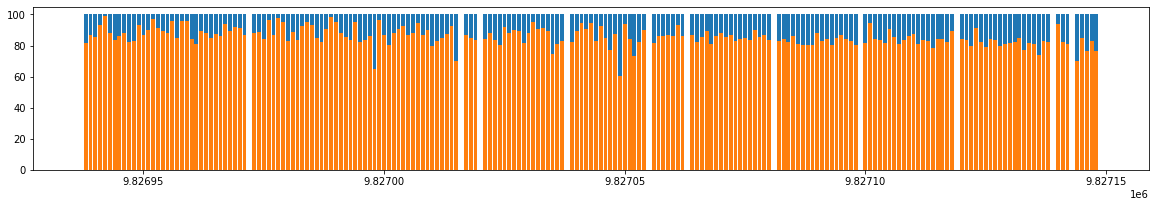

In [22]:
fig, ax = plt.subplots()
plt.style.use('ggplot')

ax.bar(blocks[:200], perc_accumulated[:200])
ax.bar(blocks[:200], perc_gas_used[:200])

## All 73739 blocks

<BarContainer object of 73739 artists>

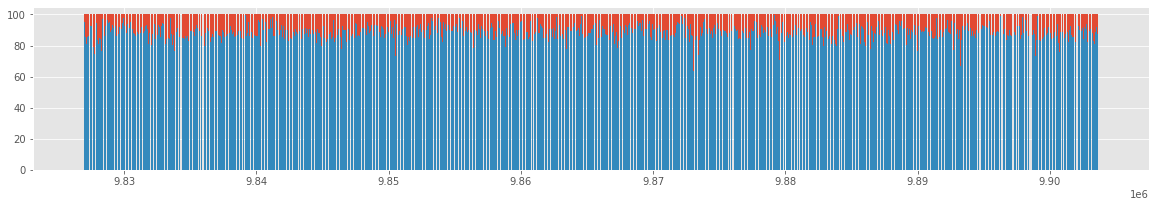

In [23]:
fig, ax = plt.subplots()
plt.style.use('ggplot')

ax.bar(blocks, perc_accumulated)
ax.bar(blocks, perc_gas_used)

## Gas Reduction

Considering `block_gas_used` +  `chunks_cost` as the total.

In [24]:
bt_0_9 = len([perc for perc in perc_chunks_cost if perc <10])
bt_10_19 = len([perc for perc in perc_chunks_cost if perc >= 10 and perc <20])
bt_20_29 = len([perc for perc in perc_chunks_cost if perc >= 20 and perc <30])
bt_30_39 = len([perc for perc in perc_chunks_cost if perc >= 30 and perc <40])
bt_40_49 = len([perc for perc in perc_chunks_cost if perc >= 40 and perc <50])
bt_50_59 = len([perc for perc in perc_chunks_cost if perc >= 50 and perc <60])
bt_60_100 = len([perc for perc in perc_chunks_cost if perc >= 60])


bt_0_19 = len([perc for perc in perc_chunks_cost if perc <20])
bt_30_100 = len([perc for perc in perc_chunks_cost if perc >= 30])

In [25]:
total = bt_0_9 + bt_10_19 + bt_20_29 + bt_30_39 + bt_40_49 + bt_50_59 + bt_60_100
perc_0_9 = (bt_0_9 / total) * 100
perc_10_19 = (bt_10_19 / total) * 100
perc_20_29 = (bt_20_29 / total) * 100
perc_30_39 = (bt_30_39 / total) * 100
perc_40_49 = (bt_40_49 / total) * 100
perc_50_59 = (bt_50_59 / total) * 100
perc_60_100 = (bt_60_100 / total) * 100

perc_0_19 = (bt_0_19 / total) * 100
perc_30_100 = (bt_30_100 / total) * 100

print('Analyzed blocks:', total)
print('Between 0-9%', bt_0_9, perc_0_9)
print('Between 10-19%', bt_10_19, perc_10_19)
print('Between 20-29%', bt_20_29, perc_20_29)
print('Between 30-39%', bt_30_39, perc_30_39)
print('Between 40-49%', bt_40_49, perc_40_49)
print('Between 50-59%', bt_50_59, perc_50_59)
print('Between 60-100%', bt_60_100, perc_60_100)

print('\nBetween 0-19%', bt_0_19, perc_0_19)
print('Between 30-100%', bt_30_100, perc_30_100)

Analyzed blocks: 73739
Between 0-9% 25608 34.727891617732816
Between 10-19% 46034 62.42829438967168
Between 20-29% 1913 2.5942852493253232
Between 30-39% 175 0.23732353300153242
Between 40-49% 8 0.010849075794355768
Between 50-59% 1 0.001356134474294471
Between 60-100% 0 0.0

Between 0-19% 71642 97.1561860074045
Between 30-100% 184 0.24952874327018268


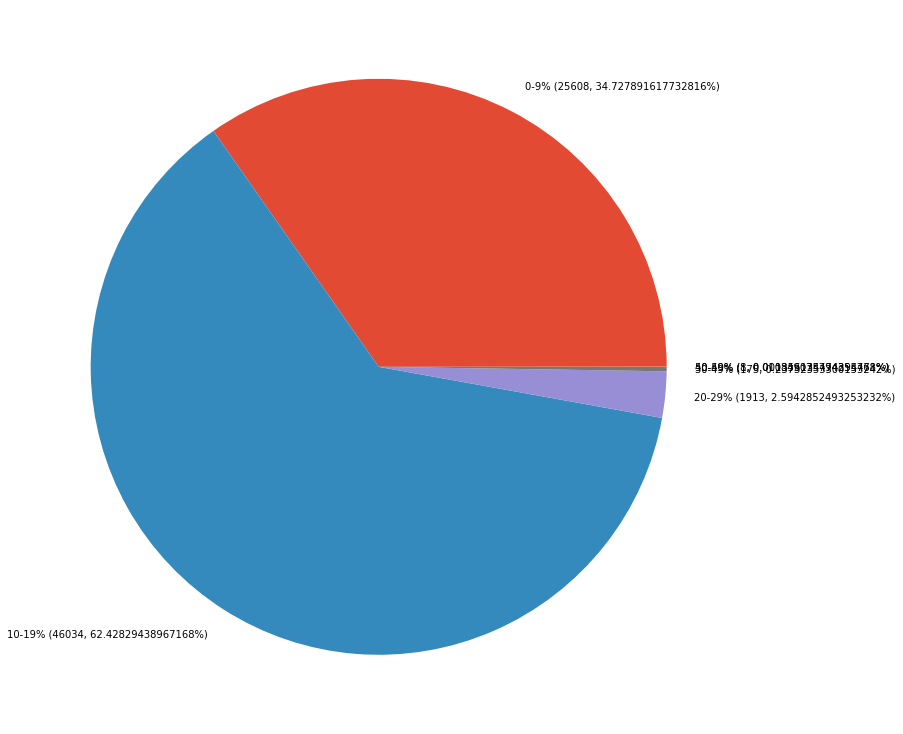

In [26]:
plt.rcParams["figure.figsize"] = (10,10)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
percentages = [
    '0-9% (' + str(bt_0_9) + ', ' + str(perc_0_9) + '%)', 
    '10-19% (' + str(bt_10_19) + ', ' + str(perc_10_19) + '%)', 
    '20-29% (' + str(bt_20_29) + ', ' + str(perc_20_29) + '%)', 
    '30-49% (' + str(bt_30_39) + ', ' + str(perc_30_39) + '%)', 
    '40-49% (' + str(bt_40_49) + ', ' + str(perc_40_49) + '%)', 
    '50-59% (' + str(bt_50_59) + ', ' + str(perc_50_59) + '%)', 
    #"60-100% (" + str(bt_60_100) + ', ' + str(perc_60_100) + '%)'
]
block_count = [bt_0_9,bt_10_19, bt_20_29, bt_30_39, bt_40_49, bt_50_59]
ax.pie(block_count, labels = percentages)
plt.show()

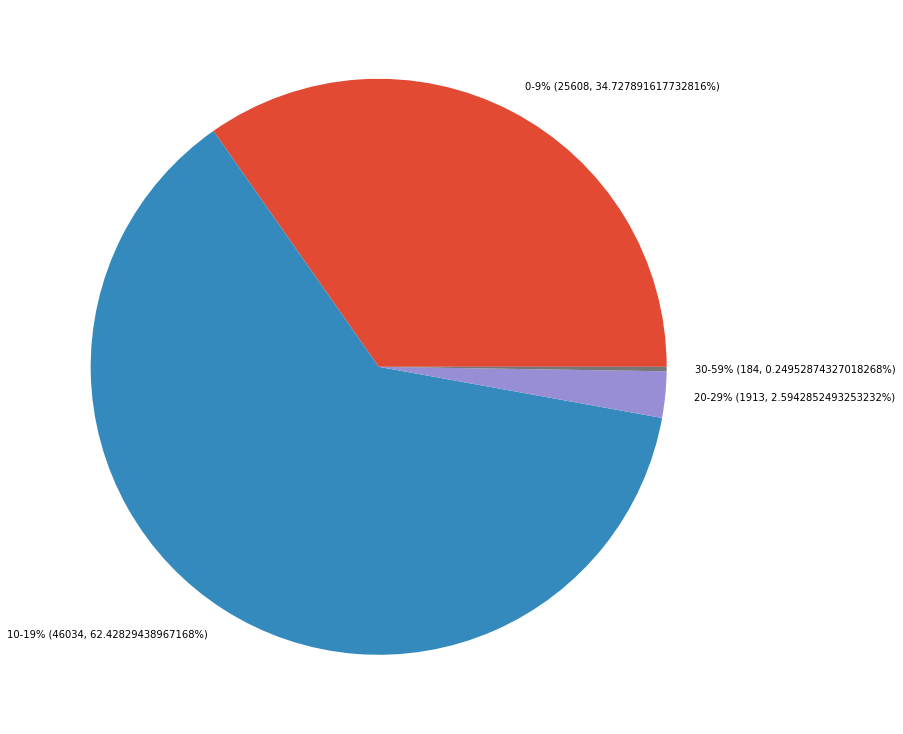

In [27]:
plt.rcParams["figure.figsize"] = (10,10)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
percentages = [
    '0-9% (' + str(bt_0_9) + ', ' + str(perc_0_9) + '%)', 
    '10-19% (' + str(bt_10_19) + ', ' + str(perc_10_19) + '%)', 
    '20-29% (' + str(bt_20_29) + ', ' + str(perc_20_29) + '%)', 
    '30-59% (' + str(bt_30_100) + ', ' + str(perc_30_100) + '%)'
]
block_count = [bt_0_9,bt_10_19, bt_20_29, bt_30_100]
ax.pie(block_count, labels = percentages)
plt.show()

For the 97% of the analyzed blocks, the gas reduction caused by chunks cost is less than 20%

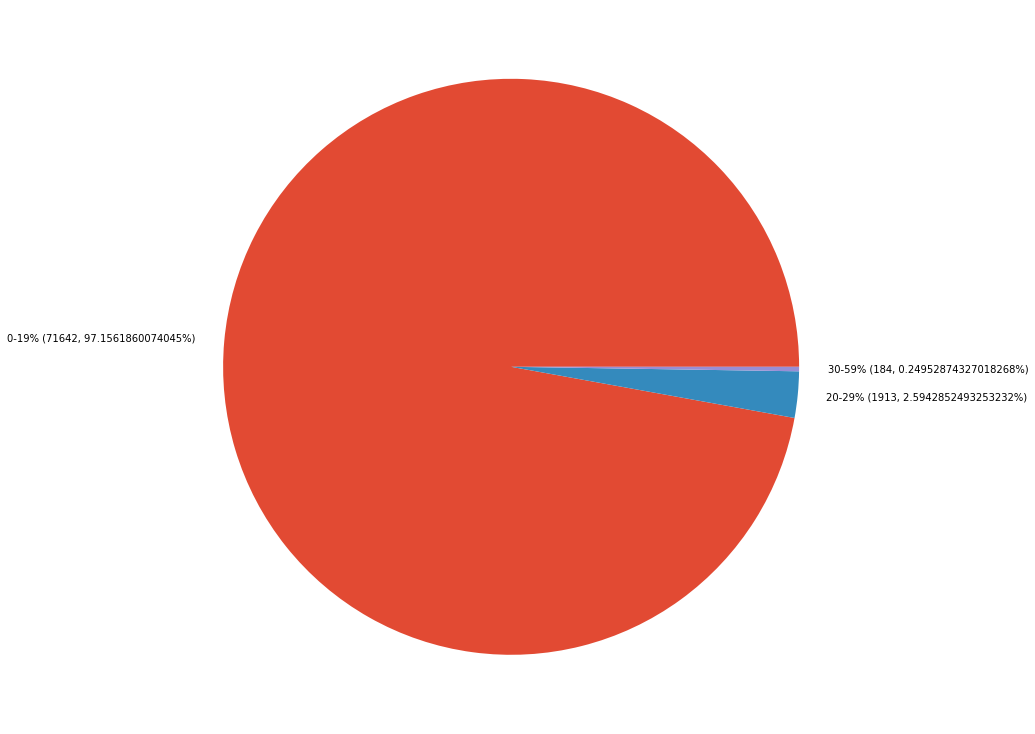

In [28]:
plt.rcParams["figure.figsize"] = (10,10)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
percentages = [
    '0-19% (' + str(bt_0_19) + ', ' + str(perc_0_19) + '%)', 
    '20-29% (' + str(bt_20_29) + ', ' + str(perc_20_29) + '%)', 
    '30-59% (' + str(bt_30_100) + ', ' + str(perc_30_100) + '%)'
]
block_count = [bt_0_19, bt_20_29, bt_30_100]
ax.pie(block_count, labels = percentages)
plt.show()